In [52]:
import numpy as np
import pandas as pd
from pandas_datareader import data,wb
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import quandl as ql

In [12]:
S0 = 100
K = 105.
T = 1.
r = 0.05
sigma = 0.2

I = 100000
z = np.random.standard_normal(I)
ST = S0 * np.exp((r - 0.5 * sigma** 2) * T + sigma * np.sqrt(T) * z)

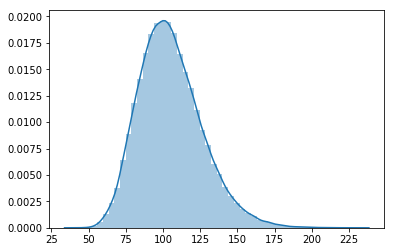

In [13]:
sns.distplot(ST)

In [14]:
hT = np.maximum(ST - K, 0)

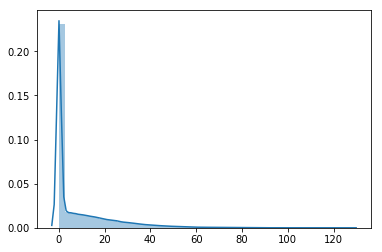

In [15]:
sns.distplot(hT)

In [16]:
C0 = (np.exp(-r*T) * np.sum(hT))/I
print('The price of the European Option is %5.3f' % (C0))

The price of the European Option is 8.056


In [56]:
BTC = ql.get('BCHARTS/BITSTAMPUSD')

In [57]:
BTC['Log_Ret'] = np.log(BTC['Close']/ BTC['Close'].shift(1))

/Users/livingdharma/miniconda2/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


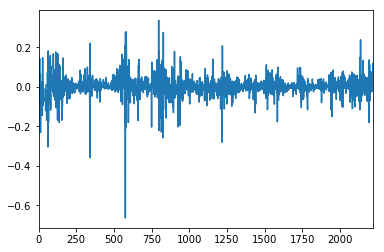

In [58]:
sns.tsplot(data=BTC['Log_Ret'])

In [65]:
BTC['Volatility'] = BTC['Log_Ret'].rolling(window=252).std() * np.sqrt(252)

In [66]:
BTC['Volatility'].tail()


Date
2017-10-09    0.722485
2017-10-10    0.721421
2017-10-11    0.721342
2017-10-12    0.730238
2017-10-13    0.730679
Name: Volatility, dtype: float64

In [ ]:
BTC[['Close', 'Volatility']].plot(subplots=True)